In [1]:
# 導入相應的庫
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from time import sleep
import os
import requests
import urllib.parse

719
[<selenium.webdriver.remote.webelement.WebElement (session="7040e7d05a2c295f6c581a405b734d04", element="f.EAC2F3DFFDB9F7A7D3F795E761711B34.d.3ED27CEECD493C8E6E554A2D602C4686.e.31")>, <selenium.webdriver.remote.webelement.WebElement (session="7040e7d05a2c295f6c581a405b734d04", element="f.EAC2F3DFFDB9F7A7D3F795E761711B34.d.3ED27CEECD493C8E6E554A2D602C4686.e.33")>, <selenium.webdriver.remote.webelement.WebElement (session="7040e7d05a2c295f6c581a405b734d04", element="f.EAC2F3DFFDB9F7A7D3F795E761711B34.d.3ED27CEECD493C8E6E554A2D602C4686.e.35")>, <selenium.webdriver.remote.webelement.WebElement (session="7040e7d05a2c295f6c581a405b734d04", element="f.EAC2F3DFFDB9F7A7D3F795E761711B34.d.3ED27CEECD493C8E6E554A2D602C4686.e.37")>, <selenium.webdriver.remote.webelement.WebElement (session="7040e7d05a2c295f6c581a405b734d04", element="f.EAC2F3DFFDB9F7A7D3F795E761711B34.d.3ED27CEECD493C8E6E554A2D602C4686.e.39")>, <selenium.webdriver.remote.webelement.WebElement (session="7040e7d05a2c295f6c581a405b
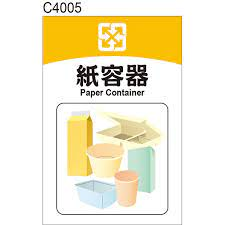
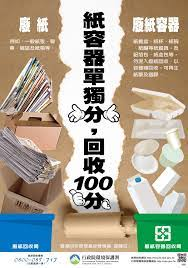
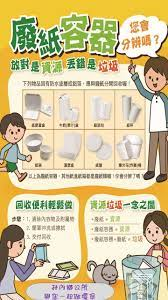
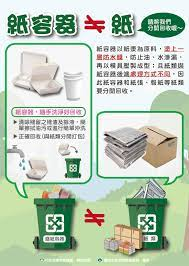
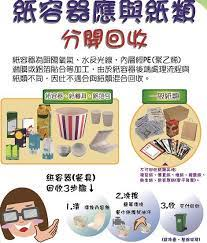
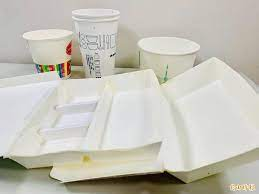
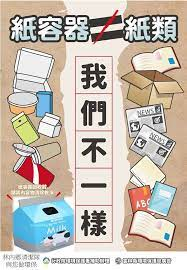
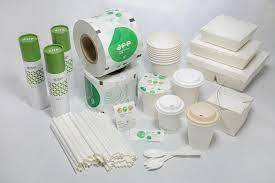
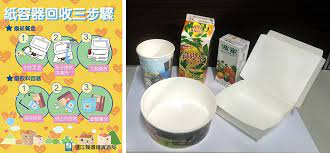
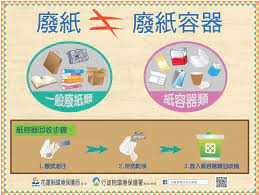
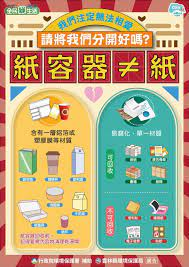
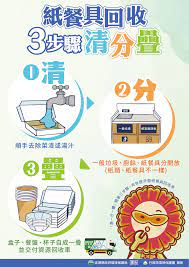
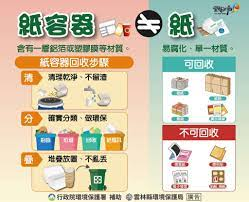
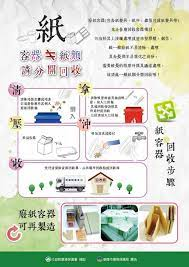
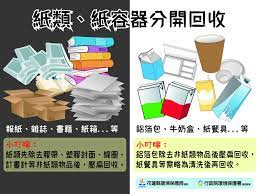
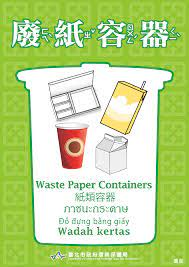
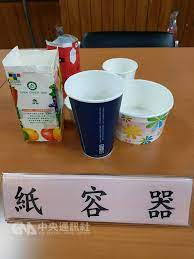
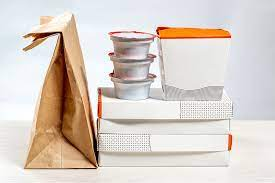
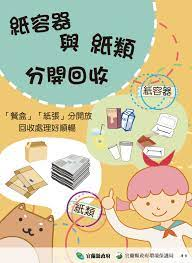
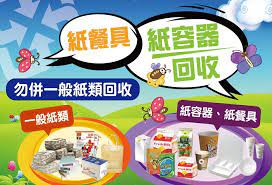

In [2]:
# 打開瀏覽器
driver = webdriver.Chrome()

# 獲取圖片源碼
driver.get("https://www.google.com/imghp")
sleep(2)

# 進行搜索
search_box = driver.find_element(By.NAME, "q")
search_box.send_keys("紙容器")
search_box.send_keys(Keys.RETURN)
sleep(2)

# 模擬下滾動操作
for i in range(50):
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    sleep(3)

# 提取圖片 URL
image_elements = driver.find_elements(By.CSS_SELECTOR, "img.rg_i.Q4LuWd")
print(len(image_elements))
print(image_elements)

image_urls = []
for img in image_elements:

    src = img.get_attribute('src')
    data_src = img.get_attribute('data-src')
    print(f"src: {src}, data-src: {data_src}")  

    if src and urllib.parse.urlparse(src).scheme in ['http', 'https']:
        image_urls.append(src)
    elif data_src and urllib.parse.urlparse(data_src).scheme in ['http', 'https']:
        image_urls.append(data_src)

print(f"抓取到的图片 URL 数量: {len(image_urls)}")
for i, url in enumerate(image_urls):
    print(f"{i+1}: {url}")

save_folder = "downloaded_images"
if not os.path.exists(save_folder):
    os.makedirs(save_folder)
    
for i, url in enumerate(image_urls[:700]): 
    try:
        response = requests.get(url)
        file_path = os.path.join(save_folder, f'image_{i+1}.jpg')
        with open(file_path, 'wb') as f:
            f.write(response.content)
        print(f"Downloaded {url} to {file_path}")
    except Exception as e:
        print(f"Could not download {url}: {e}")

driver.quit()